<a href="https://colab.research.google.com/github/mimingucci/ML/blob/main/BinaryLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

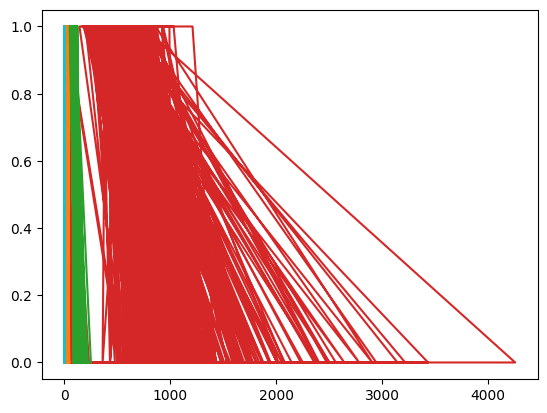

In [4]:
# plot dataset
plt.plot(X, y)
plt.show()

In [20]:
def logistic(z):
    return (1 + np.exp(-z))**(-1) # sigmoid function

def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd

In [6]:
class BinaryLogisticRegression: # using gradient descent to minimize the negative log-likelihood functions after derivation

    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):

        ### Record Info ###
        if standardize:
            X = standard_scaler(X)
        if not has_intercept:
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.n_iter = n_iter
        self.lr = lr

        ### Calculate Beta ###
        beta = np.random.randn(self.D)
        for i in range(n_iter):
            p = logistic(np.dot(self.X, beta)) # vector of probabilities
            gradient = -np.dot(self.X.T, (self.y-p)) # gradient
            beta -= self.lr*gradient

        ### Return Values ###
        self.beta = beta
        self.p = logistic(np.dot(self.X, self.beta))
        self.yhat = self.p.round()


In [21]:
binary_model = BinaryLogisticRegression()
binary_model.fit(X, y, n_iter = 10**4, lr = 0.0001)
print('In-sample accuracy: '  + str(np.mean(binary_model.yhat == binary_model.y)))

In-sample accuracy: 0.9876977152899824
